<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA </font> </center>
# <center> <font color= #000047> Simulación Matemática </font> </center>
# <center> <font color= #000047> EXAMEN 2 : Montecarlo </font> </center>
# <center> <font color= #000047> Tipo: A </font> </center>

        

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Asegúrese de escribir su nombre, y el código en las celdas comentadas.</div>

<h1> Nombres: </h1>
<hr> David Isaac Meneses Flores       725475  

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este archivo cuando se haga entrega del examen. Es necesario adjuntar las diferentes librerías o código que se utilice para la realización del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (4 ptos)](#Problema1)
2. [Reactivo 2 (3 ptos)](#Problema2)
3. [Reactivo 3 (2 ptos)](#Problema3)
<hr>   

In [1]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Reactivo 1 (4 ptos) <a name="Problema1"></a> 

**Integración Montecarlo tipo 1**

La solución de una ecuación diferencial se puede encontrar de la siguiente manera:
>$$
y(x_{k+1})=y(x_k)+\int_{x_k}^{x_{k+1}}f(x,y)
$$

donde $f(x,y)=\frac{dy}{dx}$.

Encuentre la secuencia de $y(x)$ en el intervalo $0.1\leq x\leq1.1$ con un paso de integración de $x_{k+1}-x_k=0.2$, es decir encuentre $y(x)=[y(0.1),y(0.3),y(0.5),y(0.7),y(0.9),y(1.1)]$, para la siguiente ecuación diferencial:
$$
f(x,y)=\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1.
$$

Para cada intervalo ($0.1\leq x\leq0.3$, $0.3\leq x\leq0.5$, $0.5\leq x\leq0.7$, $0.7\leq x\leq0.9$, $0.9\leq x\leq1.1$), use integración montecarlo de tipo 1 con 10,000,000 unidades. 

> **1.1.-** Escriba la función de **integración Montecarlo de tipo 1**, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar(f(x,y)), $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.


In [2]:
def montecarlo_tipo1(f,a,b,N):
    u = np.random.uniform(a,b,N)
    return (b-a)/N * f(u).sum()


>**1.2.-** Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la función $f(x,y)=\frac{dy}{dx}$.


In [34]:
def f1(x):
    return ((np.log((2)+(np.sin((2)*(x**2)))))/((x)*(np.e**((-x)**3))))


> **1.3.-** Encuentre la aproximación de las 5 integrales con sus respectivos intervalos y guardelos en las variables $y_1, ..., y_5$ (i.e., $y_1=\int_{0.1}^{0.3}f(x,y)$, ..., $y_5=\int_{0.9}^{1.1}f(x,y)$) usando el método de Montecarlo de tipo 1.


In [35]:
montecarlo_tipo1(f=f1,a=0.1,b=1.1,N=1000)

2.7196369188006204

In [39]:
N= np.logspace(1, 4, 4)
tabla= pd.DataFrame(index=N, columns=["f1"])
tabla

,f1
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN



> **1.4.-** Escriba la secuencia de valores para $y(x)$ que encontró. Esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $$y(0.1)=0.1$$ $$y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$$ $$y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$$


In [50]:
a1= 0.1
b1= 0.3
a2= 0.3
b2= 0.5
a3= 0.5
b3= 0.7
a4= 0.7
b4= 0.9
a5= 0.9
b5= 1.1

N= np.logspace(1, 6, 6)
tabla= pd.DataFrame(index=N, columns=['y(0.3)','y(0.5)','y(0.7)','y(0.9)','y(1.1)'])


for n in N:
    tabla.loc[n, "y(0.3)"]= montecarlo_tipo1(f1, a1,b1,int(n))
    tabla.loc[n, "y(0.5)"]= montecarlo_tipo1(f1, a2,b2,int(n))
    tabla.loc[n, "y(0.7)"]= montecarlo_tipo1(f1, a3,b3,int(n))
    tabla.loc[n, "y(0.9)"]= montecarlo_tipo1(f1, a4,b4,int(n))
    tabla.loc[n, "y(1.1)"]= montecarlo_tipo1(f1, a5,b5,int(n))

    
tabla

,y(0.3),y(0.5),y(0.7),y(0.9),y(1.1)
10.0,0.845989,0.462873,0.408374,0.462943,0.594936
100.0,0.862178,0.450121,0.408357,0.451874,0.58799
1000.0,0.821442,0.45618,0.408316,0.455471,0.583649
10000.0,0.802262,0.455785,0.408103,0.455836,0.583185
100000.0,0.808123,0.455498,0.408136,0.455832,0.583719
1000000.0,0.806897,0.45554,0.40814,0.455827,0.583747


<hr>   

### Reactivo 2 (3 ptos) <a name="Problema2"></a> 

**Generación de fractales**

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:


In [52]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

> cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [54]:
A0

array([[0.  , 0.  , 0.  ],
       [0.  , 0.18, 0.  ],
       [0.  , 0.  , 0.  ]])

In [55]:
b0

array([0, 0, 0])

In [56]:
A1

array([[ 0.85,  0.  ,  0.  ],
       [ 0.  ,  0.85,  0.1 ],
       [ 0.  , -0.1 ,  0.85]])

In [57]:
b1

array([0. , 1.6, 0. ])

In [58]:
A2

array([[ 0.2, -0.2,  0. ],
       [ 0.2,  0.2,  0. ],
       [ 0. ,  0. ,  0.3]])

In [59]:
b2

array([0. , 0.8, 0. ])

In [60]:
A3

array([[-0.2,  0.2,  0. ],
       [ 0.2,  0.2,  0. ],
       [ 0. ,  0. ,  0.3]])

In [61]:
b3

array([0. , 0.8, 0. ])

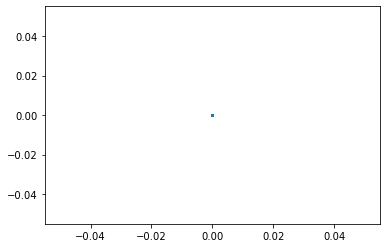

In [67]:
x=[0]
y=[0]
z=[0]
A=[A0,A1,A2,A3]
b=[b0,b1,b2,b3]

for k in range (1000000):
    i = np.random.choice([0,1,2,3])
    p = A[i]@np.array([x[0],y[0],z[0]])+b[i]
    x.append(p[0])
    z.append(p[0])
    y.append(p[0])
plt.scatter(x,y,s=1)

<hr>   

### Reactivo 3 (2 ptos) <a name="Problema3"></a> 
**Rendimientos Manejo librería Pandas**

Suponga que desea invertir en **Spotify** o **Mercado Libre**. 

>**3.1.-** Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*. Donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.


In [3]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None):
    
    # Frecuencia de muestreo por defecto (freq='d')
    closes = web.DataReader(tickers, start=start_date, end=end_date,
                            data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes


> **3.2.-** Obtenga los precios de cierre ajustados para Spotify y Mercado Libre desde el 4 de noviembre de 2019 al 4 de noviembre de 2021.


In [9]:
# Instrumentos a descargar (Spotify y Mercado libre)
names = ['SPOT','MELI']
start = '2019-11-04'
end= '2021-11-04'

In [10]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(tickers = names, start_date=start, end_date = end)

In [11]:
closes

Symbols,SPOT,MELI
Date,,
2019-11-04,154.149994,485.790009
2019-11-05,150.369995,485.059998
2019-11-06,148.479996,482.950012
2019-11-07,148.169998,491.989990
2019-11-08,147.850006,494.420013
...,...,...
2021-10-29,289.399994,1481.020020
2021-11-01,300.950012,1489.660034
2021-11-02,298.200012,1508.709961


In [12]:
closes.head(15)

Symbols,SPOT,MELI
Date,,
2019-11-04,154.149994,485.790009
2019-11-05,150.369995,485.059998
2019-11-06,148.479996,482.950012
2019-11-07,148.169998,491.989990
2019-11-08,147.850006,494.420013
2019-11-11,146.630005,497.619995
2019-11-12,146.389999,499.500000
2019-11-13,146.779999,513.729980
2019-11-14,148.759995,536.539978


In [13]:
closes.tail(10)

Symbols,SPOT,MELI
Date,,
2021-10-22,252.960007,1503.780029
2021-10-25,257.890015,1536.510010
2021-10-26,252.199997,1544.660034
2021-10-27,273.130005,1500.000000
2021-10-28,288.950012,1516.869995
2021-10-29,289.399994,1481.020020
2021-11-01,300.950012,1489.660034
2021-11-02,298.200012,1508.709961
2021-11-03,298.079987,1531.930054



> **3.3.-** Calcule el rendimiento simple para ambas empresas.

<AxesSubplot:xlabel='Date'>

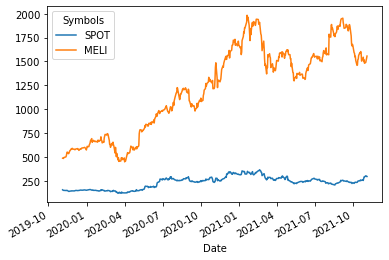

In [14]:
closes.plot()

In [16]:
closes.describe()

Symbols,SPOT,MELI
count,506.000000,506.000000
mean,230.286363,1211.309684
std,62.599146,453.274121
min,117.639999,447.339996
25%,155.840000,747.682510
50%,242.709999,1297.890015
75%,269.899994,1571.395020
max,364.589996,1984.339966


In [17]:
closes.head()

Symbols,SPOT,MELI
Date,,
2019-11-04,154.149994,485.790009
2019-11-05,150.369995,485.059998
2019-11-06,148.479996,482.950012
2019-11-07,148.169998,491.989990
2019-11-08,147.850006,494.420013


In [18]:
closes.pct_change()

Symbols,SPOT,MELI
Date,,
2019-11-04,NaN,NaN
2019-11-05,-0.024522,-0.001503
2019-11-06,-0.012569,-0.004350
2019-11-07,-0.002088,0.018718
2019-11-08,-0.002160,0.004939
...,...,...
2021-10-29,0.001557,-0.023634
2021-11-01,0.039910,0.005834
2021-11-02,-0.009138,0.012788


In [19]:
returns = closes.pct_change().dropna()
returns

Symbols,SPOT,MELI
Date,,
2019-11-05,-0.024522,-0.001503
2019-11-06,-0.012569,-0.004350
2019-11-07,-0.002088,0.018718
2019-11-08,-0.002160,0.004939
2019-11-11,-0.008252,0.006472
...,...,...
2021-10-29,0.001557,-0.023634
2021-11-01,0.039910,0.005834
2021-11-02,-0.009138,0.012788


In [20]:
returns.head()

Symbols,SPOT,MELI
Date,,
2019-11-05,-0.024522,-0.001503
2019-11-06,-0.012569,-0.004350
2019-11-07,-0.002088,0.018718
2019-11-08,-0.002160,0.004939
2019-11-11,-0.008252,0.006472


In [21]:
returns.tail()

Symbols,SPOT,MELI
Date,,
2021-10-29,0.001557,-0.023634
2021-11-01,0.039910,0.005834
2021-11-02,-0.009138,0.012788
2021-11-03,-0.000403,0.015391
2021-11-04,-0.015432,0.016032


<AxesSubplot:xlabel='Date'>

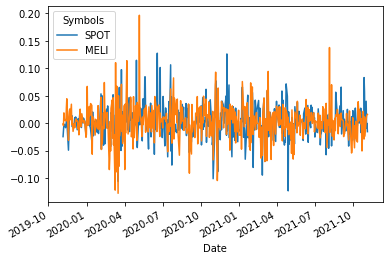

In [22]:
returns.plot()

In [23]:
x = np.linspace(-0.9,1)
y1=x
y2=np.log(1+x)

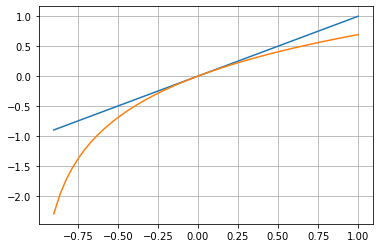

In [24]:
plt.plot(x,y1,x,y2)
plt.grid()

In [25]:
closes.head()

Symbols,SPOT,MELI
Date,,
2019-11-04,154.149994,485.790009
2019-11-05,150.369995,485.059998
2019-11-06,148.479996,482.950012
2019-11-07,148.169998,491.989990
2019-11-08,147.850006,494.420013


In [26]:
closes.shift().head()

Symbols,SPOT,MELI
Date,,
2019-11-04,NaN,NaN
2019-11-05,154.149994,485.790009
2019-11-06,150.369995,485.059998
2019-11-07,148.479996,482.950012
2019-11-08,148.169998,491.989990


In [27]:
log_returns = np.log(closes/closes.shift()).dropna()
log_returns

Symbols,SPOT,MELI
Date,,
2019-11-05,-0.024827,-0.001504
2019-11-06,-0.012649,-0.004359
2019-11-07,-0.002090,0.018545
2019-11-08,-0.002162,0.004927
2019-11-11,-0.008286,0.006451
...,...,...
2021-10-29,0.001556,-0.023918
2021-11-01,0.039134,0.005817
2021-11-02,-0.009180,0.012707


<AxesSubplot:xlabel='Date'>

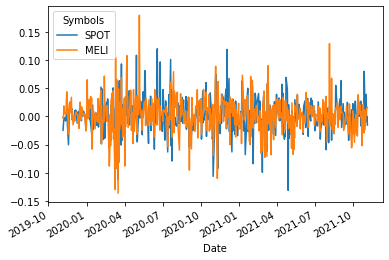

In [28]:
log_returns.plot()

In [29]:
diff = np.abs(returns - log_returns)
diff

Symbols,SPOT,MELI
Date,,
2019-11-05,3.056607e-04,0.000001
2019-11-06,7.965797e-05,0.000009
2019-11-07,2.182507e-06,0.000173
2019-11-08,2.335359e-06,0.000012
2019-11-11,3.423302e-05,0.000021
...,...,...
2021-10-29,1.211333e-06,0.000284
2021-11-01,7.758376e-04,0.000017
2021-11-02,4.200514e-05,0.000081


<AxesSubplot:xlabel='Date'>

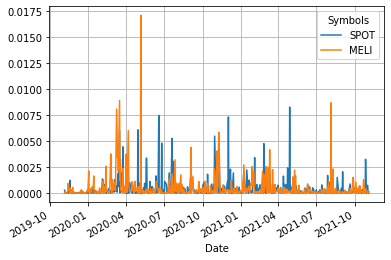

In [30]:
diff.plot(grid=True)

In [31]:
log_returns.describe()

Symbols,SPOT,MELI
count,505.000000,505.000000
mean,0.001275,0.002306
std,0.031260,0.032111
min,-0.131446,-0.136541
25%,-0.014808,-0.012022
50%,0.000662,0.003771
75%,0.018716,0.018724
max,0.119877,0.179300


In [32]:
log_returns.std()

Symbols
SPOT    0.031260
MELI    0.032111
dtype: float64